In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
retail = pd.read_csv('myntra_products_catalog.csv')
retail.head()

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White


In [5]:
retail.shape

(12491, 8)

In [7]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     12491 non-null  int64 
 1   ProductName   12491 non-null  object
 2   ProductBrand  12491 non-null  object
 3   Gender        12491 non-null  object
 4   Price (INR)   12491 non-null  int64 
 5   NumImages     12491 non-null  int64 
 6   Description   12491 non-null  object
 7   PrimaryColor  11597 non-null  object
dtypes: int64(3), object(5)
memory usage: 780.8+ KB


In [9]:
retail.describe()

,ProductID,Price (INR),NumImages
count,1.249100e+04,12491.000000,12491.000000
mean,9.917160e+06,1452.660956,4.913698
std,1.438006e+06,2118.503976,1.092333
min,1.012060e+05,90.000000,1.000000
25%,1.006215e+07,649.000000,5.000000
50%,1.015463e+07,920.000000,5.000000
75%,1.021565e+07,1499.000000,5.000000
max,1.027514e+07,63090.000000,10.000000


In [11]:
retail_null = round(100*(retail.isnull().sum())/len(retail), 2)
retail_null

ProductID       0.00
ProductName     0.00
ProductBrand    0.00
Gender          0.00
Price (INR)     0.00
NumImages       0.00
Description     0.00
PrimaryColor    7.16
dtype: float64

In [13]:
# Check for duplicates
retail.duplicated().sum()

0

In [15]:
# Drop rows with missing values
retail = retail.dropna()
retail.shape

(11597, 8)

In [17]:
# Ensure data types are correct
retail['ProductID'] = retail['ProductID'].astype('string')
retail['ProductName'] = retail['ProductName'].astype('string')
retail['ProductBrand'] = retail['ProductBrand'].astype('string')
retail['Gender'] = retail['Gender'].astype('category')
retail['Price (INR)'] = retail['Price (INR)'].astype('float64')
retail['NumImages'] = retail['NumImages'].astype('int64')
retail['Description'] = retail['Description'].astype('string')
retail['PrimaryColor'] = retail['PrimaryColor'].astype('category')
retail.head()

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745.0,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810.0,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899.0,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599.0,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759.0,5,"Brown and off-white printed casual shirt, has ...",White


In [19]:
# Remove spaces from string columns
string_columns = ['ProductID', 'ProductName', 'ProductBrand', 'Description', 'PrimaryColor']
for col in string_columns:
    retail[col] = retail[col].str.strip()

In [21]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11597 entries, 0 to 12490
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ProductID     11597 non-null  string  
 1   ProductName   11597 non-null  string  
 2   ProductBrand  11597 non-null  string  
 3   Gender        11597 non-null  category
 4   Price (INR)   11597 non-null  float64 
 5   NumImages     11597 non-null  int64   
 6   Description   11597 non-null  string  
 7   PrimaryColor  11597 non-null  object  
dtypes: category(1), float64(1), int64(1), object(1), string(4)
memory usage: 736.4+ KB


In [23]:
retail.describe()

,Price (INR),NumImages
count,11597.000000,11597.000000
mean,1460.912995,4.967319
std,2159.003043,1.063547
min,153.000000,1.000000
25%,649.000000,5.000000
50%,939.000000,5.000000
75%,1499.000000,5.000000
max,63090.000000,10.000000


In [25]:
gender_counts = retail['Gender'].value_counts().sort_values(ascending=False)
gender_counts

Gender
Women          4732
Men            4343
Unisex         1056
Boys           1032
Girls           388
Unisex Kids      46
Name: count, dtype: int64

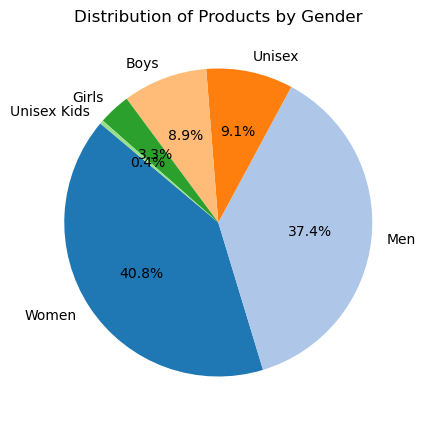

In [27]:
# Prepare data for pie chart
labels = gender_counts.index
sizes = gender_counts.values

# Plot the pie chart
plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors = plt.cm.tab20(range(len(labels))))
plt.title('Distribution of Products by Gender')

# Display plot
plt.show()

In [29]:
average_price_by_gender = retail.groupby('Gender', observed = False)['Price (INR)'].mean()
average_price_by_gender

Gender
Boys            817.713178
Girls           909.162371
Men            1587.423440
Unisex         2294.987689
Unisex Kids    1082.717391
Women          1347.861581
Name: Price (INR), dtype: float64

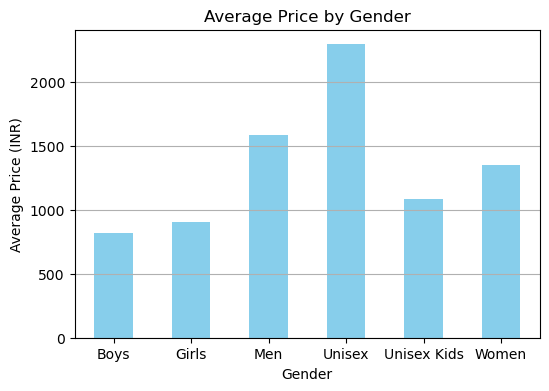

In [31]:
# Plotting the histogram
plt.figure(figsize=(6, 4))
#colors = plt.cm.tab20b(np.linspace(0, 1, len(average_price_by_gender)))
average_price_by_gender.plot(kind='bar', color='skyblue')
plt.title('Average Price by Gender')
plt.ylabel('Average Price (INR)')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show the plot
plt.show()

In [33]:
color_mapping = {
    'Blue': '#0041c2',
    'Black': '#20292f',
    'Red': '#d0312d',
    'Green': 'green',
    'White': '#f2f3f4',
    'Grey': 'grey',
    'Brown': 'saddlebrown',
    'Yellow': '#FFFF00',
    'Pink': 'hotpink',
    'Beige': 'moccasin',
    'Gold': '#eebc51',
    'Maroon': 'maroon',
    'Orange': '#FF7F0E',
    'Silver': '#c0c0c0',
    'Purple': 'purple',
    'Burgundy': '#660033',
    'Khaki': '#c3b091',
    'Navy': 'navy',
    'Lavender': '#dfc5fe',
    'Matte': '#854B4A',  # Assuming similar colors for such shades
    'Mustard': '#e1ad01',
    'Magenta': '#ec00bc',
    'Charcoal': '#36454f',
    'Rose': 'pink',
    'Platinum': '#e5e4de',
    'Bronze': '#c76d40',
    'Peach': '#f4a384',
}
# Count occurrences of each primary color
color_counts = retail['PrimaryColor'].value_counts()

# Prepare colors in the specified order to be used for plotting
colors = [color_mapping[color] for color in color_counts.index]

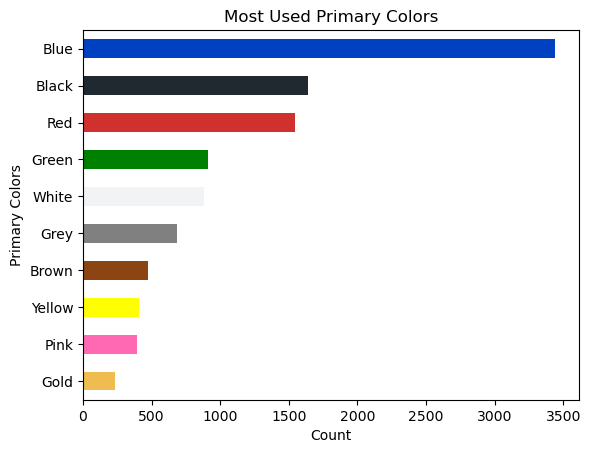

In [35]:
# Plot the bar chart using the mapped colors
color_counts.head(10).plot(kind='barh', color=colors)
plt.title('Most Used Primary Colors')
plt.xlabel('Count')
plt.ylabel('Primary Colors')
plt.gca().invert_yaxis() 
plt.gca().set_facecolor('white')
plt.show()

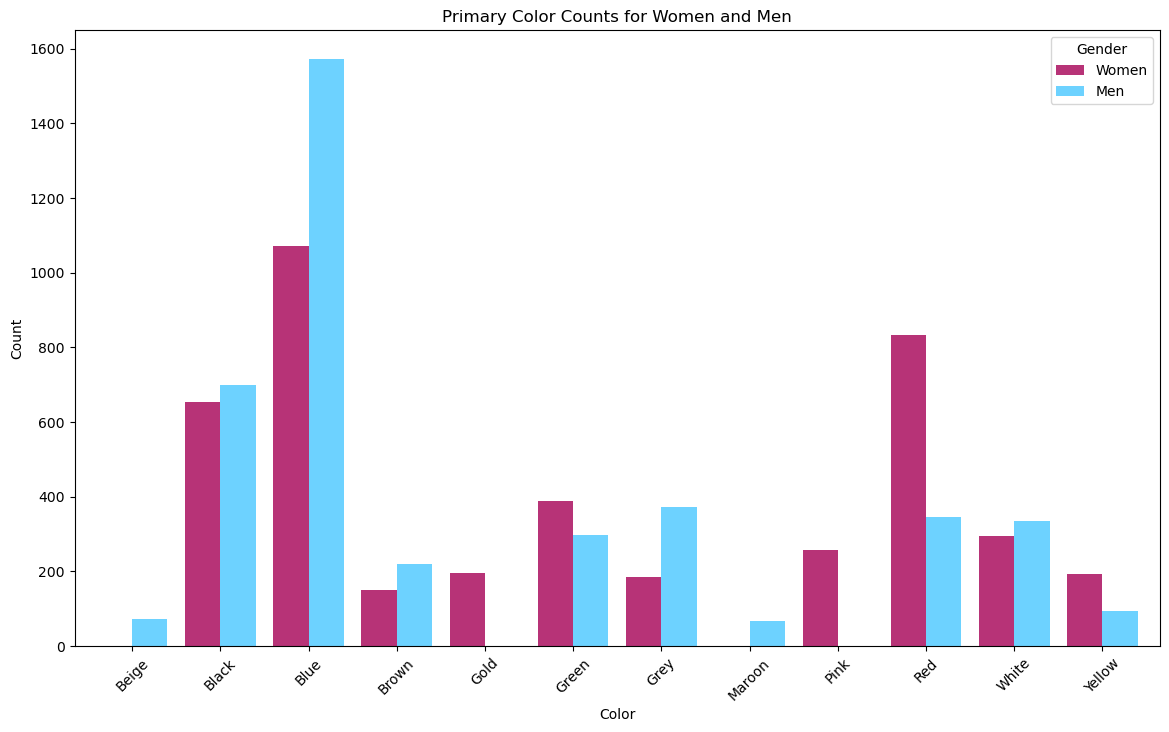

In [37]:
 #Filter the dataset for "Women" and "Men"
women_retail = retail[retail['Gender'] == 'Women']
men_retail = retail[retail['Gender'] == 'Men']

# Count occurrences of each primary color for "Women"
women_color_counts = women_retail['PrimaryColor'].value_counts().head(10)

# Count occurrences of each primary color for "Men"
men_color_counts = men_retail['PrimaryColor'].value_counts().head(10)

# Combine the color counts into a single DataFrame
color_counts_df = pd.DataFrame({
    'Women': women_color_counts,
    'Men': men_color_counts
}).fillna(0)  # Fill NaN values with 0 for colors not present in both genders

# Plot the grouped bar graph
color_counts_df.plot(kind='bar', figsize=(14, 8), color=['#B73377', '#6DD2FF'], width=0.8)
plt.title('Primary Color Counts for Women and Men')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

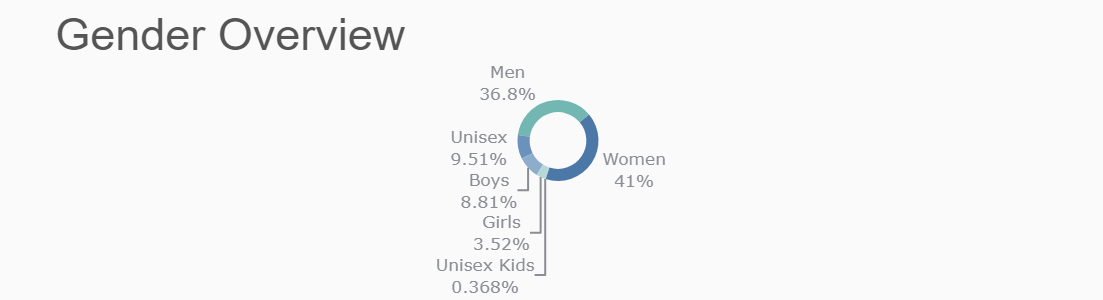

In [53]:
import pandas as pd
import plotly.express as px

# Sample data for illustration
data = pd.read_csv('myntra_products_catalog.csv')

# Create a DataFrame
df = pd.DataFrame(data)

# Create pie chart
fig = px.pie(df, names='Gender', height=300, width=600, hole=0.7, title='Gender Overview',
             color_discrete_sequence=['#4c78a8', '#72b7b2', '#6b92bc'])

# Update traces for styling
fig.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', rotation=50)

# Layout adjustments
fig.update_layout(margin=dict(t=100, b=30, l=0, r=0), showlegend=False,
                  plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                  title_font=dict(size=45, color='#555', family="Lato, sans-serif"),
                  font=dict(size=17, color='#8a8d93'),
                  hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))

# Show figure
fig.show()


Columns in the DataFrame:
Index(['ProductID', 'ProductName', 'ProductBrand', 'Gender', 'Price (INR)',
       'NumImages', 'Description', 'PrimaryColor'],
      dtype='object')

First few rows of the DataFrame:
   ProductID                                        ProductName ProductBrand  \
0   10017413  DKNY Unisex Black & Grey Printed Medium Trolle...         DKNY   
1   10016283  EthnoVogue Women Beige & Grey Made to Measure ...   EthnoVogue   
2   10009781  SPYKAR Women Pink Alexa Super Skinny Fit High-...       SPYKAR   
3   10015921  Raymond Men Blue Self-Design Single-Breasted B...      Raymond   
4   10017833  Parx Men Brown & Off-White Slim Fit Printed Ca...         Parx   

   Gender  Price (INR)  NumImages  \
0  Unisex        11745          7   
1   Women         5810          7   
2   Women          899          7   
3     Men         5599          5   
4     Men          759          5   

                                         Description PrimaryColor  
0  Black and grey 

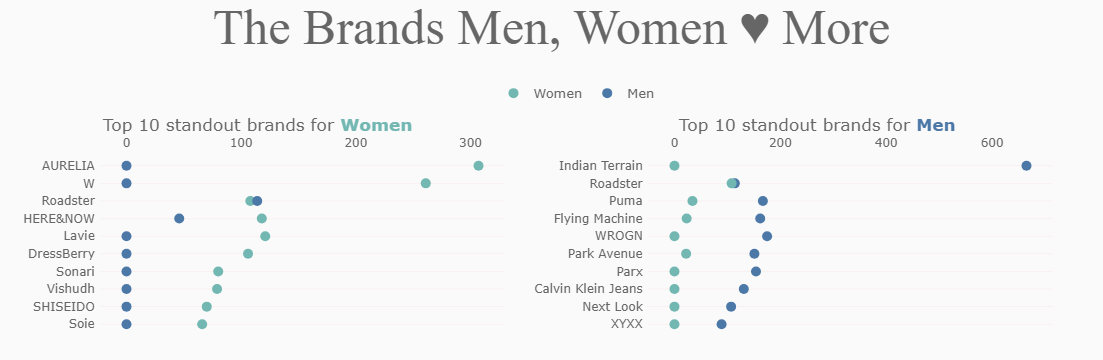

In [51]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sample DataFrame for demonstration
data = pd.read_csv('myntra_products_catalog.csv')
df = pd.DataFrame(data)

# Debugging: Check the columns and data
print("Columns in the DataFrame:")
print(df.columns)

print("\nFirst few rows of the DataFrame:")
print(df.head())

# Clean column names to remove any leading/trailing spaces
df.columns = df.columns.str.strip()

# Check if 'ProductBrand' and 'Gender' columns exist
if 'ProductBrand' not in df.columns:
    raise KeyError("'ProductBrand' column is missing in the DataFrame.")
if 'Gender' not in df.columns:
    raise KeyError("'Gender' column is missing in the DataFrame.")

# Create the crosstab
df_pb_g = pd.crosstab(df['ProductBrand'], df['Gender'], margins=True).reset_index()

# Sort and get top 10 brands for each gender
df_pb_m = df_pb_g.sort_values(by='Men', ascending=False)[1:11]
df_pb_w = df_pb_g.sort_values(by='Women', ascending=False)[1:11]
df_pb_u = df_pb_g.sort_values(by='Unisex', ascending=False)[1:11]

# Create the plot
fig = make_subplots(rows=1, cols=2, vertical_spacing=0, horizontal_spacing=0.15)

# Add traces for Women
fig.add_trace(go.Scatter(
    x=df_pb_w['Women'], 
    y=df_pb_w['ProductBrand'], 
    marker=dict(size=10, color=['#72b7b2']*10),
    mode='markers', 
    name='Women'
), row=1, col=1)

# Add traces for Men
fig.add_trace(go.Scatter(
    x=df_pb_w['Men'], 
    y=df_pb_w['ProductBrand'], 
    marker=dict(size=10, color=['#4c78a8']*10),
    mode='markers', 
    name='Men'
), row=1, col=1)

# Add horizontal traces for Men
fig.add_trace(go.Scatter(
    x=df_pb_m['Men'], 
    y=df_pb_m['ProductBrand'], 
    marker=dict(size=10, color=['#4c78a8']*10),
    mode='markers', 
    showlegend=False, 
    name='Men', 
    orientation='h'
), row=1, col=2)

# Add horizontal traces for Women
fig.add_trace(go.Scatter(
    x=df_pb_m['Women'], 
    y=df_pb_m['ProductBrand'], 
    marker=dict(size=10, color=['#72b7b2']*10),
    mode='markers', 
    showlegend=False, 
    name='Women', 
    orientation='h'
), row=1, col=2)

# Update the layout and axes
fig.update_yaxes(ticksuffix=' ', gridcolor='#F9F1F0', categoryorder='total ascending') 
fig.update_xaxes(zeroline=False, showgrid=False, side='top')

fig.update_layout(
    height=450, 
    margin=dict(b=20, r=50, l=100, t=150),
    hovermode="y unified", 
    title={'text': "<span style='font-size:50px; color=#555; font-family:Times New Roman'>The Brands Men, Women ♥️ More</span>",
           'y':0.91, 'x':0.5, 
           'xanchor': 'center', 'yanchor': 'top'},
    plot_bgcolor='#fafafa', 
    paper_bgcolor='#fafafa',
    font=dict(color='#666'),
    hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
    legend=dict(title="", orientation="h", 
                yanchor="bottom", xanchor="center",
                x=0.5, y=1.22, 
                font_size=13)
)

# Annotations for the plot
fig.add_annotation(dict(
    x=0, y=1.2, align='center',
    xref="paper", yref="paper",
    showarrow=False, font_size=17,
    text="Top 10 standout brands for <span style='color:#72b7b2'><b>Women</b></span><br>"
))
fig.add_annotation(dict(
    x=0.9, y=1.2, align='center',
    xref="paper", yref="paper",
    showarrow=False, font_size=17,
    text="Top 10 standout brands for <span style='color:#4c78a8'><b>Men</b></span><br>"
))

# Show the plot
fig.show()


Columns in the DataFrame:
Index(['ProductID', 'ProductName', 'ProductBrand', 'Gender', 'Price (INR)',
       'NumImages', 'Description', 'PrimaryColor'],
      dtype='object')

First few rows of the DataFrame:
   ProductID                                        ProductName ProductBrand  \
0   10017413  DKNY Unisex Black & Grey Printed Medium Trolle...         DKNY   
1   10016283  EthnoVogue Women Beige & Grey Made to Measure ...   EthnoVogue   
2   10009781  SPYKAR Women Pink Alexa Super Skinny Fit High-...       SPYKAR   
3   10015921  Raymond Men Blue Self-Design Single-Breasted B...      Raymond   
4   10017833  Parx Men Brown & Off-White Slim Fit Printed Ca...         Parx   

   Gender  Price (INR)  NumImages  \
0  Unisex        11745          7   
1   Women         5810          7   
2   Women          899          7   
3     Men         5599          5   
4     Men          759          5   

                                         Description PrimaryColor  
0  Black and grey 

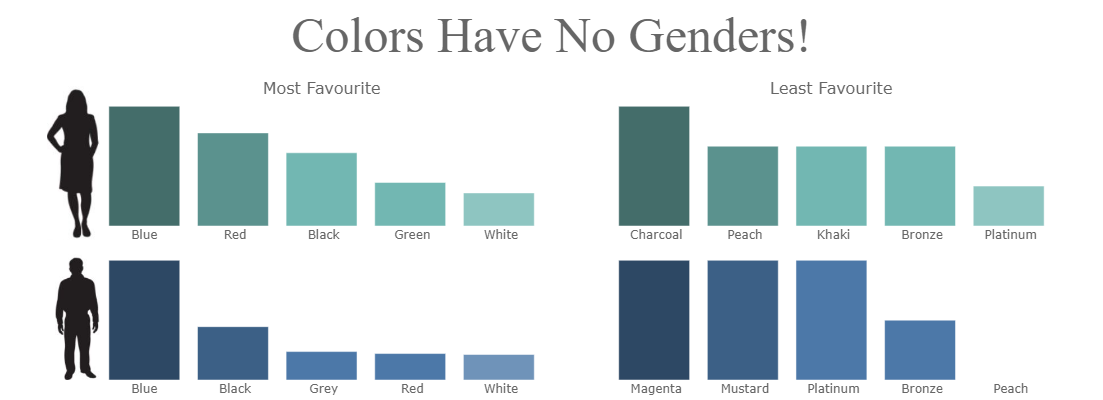

In [55]:
# Import necessary libraries
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sample DataFrame for demonstration
data = pd.read_csv('myntra_products_catalog.csv')
df = pd.DataFrame(data)

# Check the structure of the DataFrame
print("Columns in the DataFrame:")
print(df.columns)

print("\nFirst few rows of the DataFrame:")
print(df.head())

# Clean column names to remove any leading/trailing spaces
df.columns = df.columns.str.strip()

# Check for required columns
if 'PrimaryColor' not in df.columns:
    raise KeyError("'PrimaryColor' column is missing in the DataFrame.")
if 'Gender' not in df.columns:
    raise KeyError("'Gender' column is missing in the DataFrame.")

# Create crosstab
df_pc_gen = pd.crosstab(df['PrimaryColor'], df['Gender']).reset_index()

# Sorting for Women and Men
df_pc_f = df_pc_gen.sort_values(by='Women', ascending=False)
df_pc_f = df_pc_f[df_pc_f['PrimaryColor'] != 'Missing']
df_pc_m = df_pc_gen.sort_values(by='Men', ascending=False)

# Get least favorite colors for men
df_pc_m_l = df_pc_m.iloc[[20, 21, 22, 23, 24]] if len(df_pc_m) > 24 else df_pc_m.tail(5)

# Unisex sorting
df_pc_u = df_pc_gen.sort_values(by='Unisex', ascending=False)

# Create the chart
fig = make_subplots(rows=2, cols=2,
                    vertical_spacing=0.1, horizontal_spacing=0.07,
                    subplot_titles=("Most Favourite", "Least Favourite"))

# Add traces for Women's most favorite colors
fig.add_trace(go.Bar(y=df_pc_f['Women'][:5], x=df_pc_f['PrimaryColor'][:5], name='Women',
                     marker=dict(color=['#446d6a', '#5b928e', '#72b7b2', '#72b7b2', '#8ec5c1'])),
              row=1, col=1)

# Add traces for Women's least favorite colors
fig.add_trace(go.Bar(y=df_pc_f['Women'].tail(5), x=df_pc_f['PrimaryColor'].tail(5), name='Women',
                     marker=dict(color=['#446d6a', '#5b928e', '#72b7b2', '#72b7b2', '#8ec5c1'])),
              row=1, col=2)

# Add traces for Men's most favorite colors
fig.add_trace(go.Bar(y=df_pc_m['Men'][:5], x=df_pc_m['PrimaryColor'][:5], name='Men',
                     marker=dict(color=['#2d4864', '#3c6086', '#4c78a8', '#4c78a8', '#6f93b9'])),
              row=2, col=1)

# Add traces for Men's least favorite colors
fig.add_trace(go.Bar(y=df_pc_m_l['Men'], x=df_pc_m_l['PrimaryColor'], name='Men',
                     marker=dict(color=['#2d4864', '#3c6086', '#4c78a8', '#4c78a8', '#6f93b9'])),
              row=2, col=2)

# Update axes and layout
fig.update_yaxes(visible=False)
fig.update_xaxes(zeroline=False, showgrid=False)
fig.update_layout(height=400,
                  margin=dict(b=5, r=50, l=100, t=100),
                  hovermode="x unified",
                  title={'text': "<span style='font-size:50px; color=#444; font-family:Times New Roman'>Colors Have No Genders!</span>",
                         'y': 0.9, 'x': 0.5,
                         'xanchor': 'center', 'yanchor': 'top'},
                  template='plotly_white',
                  font=dict(color='#666'),
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
                  showlegend=False)

# Add layout images
fig.add_layout_image(
    dict(
        source="https://i.imgur.com/3Cab96Z.jpg",
        xref="paper", yref="paper",
        x=0, y=0.5,
        sizex=0.5, sizey=0.55,
        xanchor="right", yanchor="bottom", sizing="contain",
    )
)
fig.add_layout_image(
    dict(
        source="https://i.imgur.com/c6QKoDy.jpg",
        xref="paper", yref="paper",
        x=0, y=0,
        sizex=0.5, sizey=0.45,
        xanchor="right", yanchor="bottom", sizing="contain",
    )
)

# Show the plot
fig.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('myntra_products_catalog.csv')

# Encode categorical features
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Split features and target
X = data.drop('PrimaryColor', axis=1)
y = data['Gender']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

# SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_predictions))
print(classification_report(y_test, knn_predictions))


Random Forest Accuracy: 0.9995998399359743
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       1.00      1.00      1.00        74
           2       1.00      1.00      1.00       948
           3       1.00      1.00      1.00       236
           4       1.00      0.90      0.95        10
           5       1.00      1.00      1.00      1023

    accuracy                           1.00      2499
   macro avg       1.00      0.98      0.99      2499
weighted avg       1.00      1.00      1.00      2499

